# 2. logistic_regression（逻辑回归）

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = r'.\data\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam1       100 non-null float64
Exam2       100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


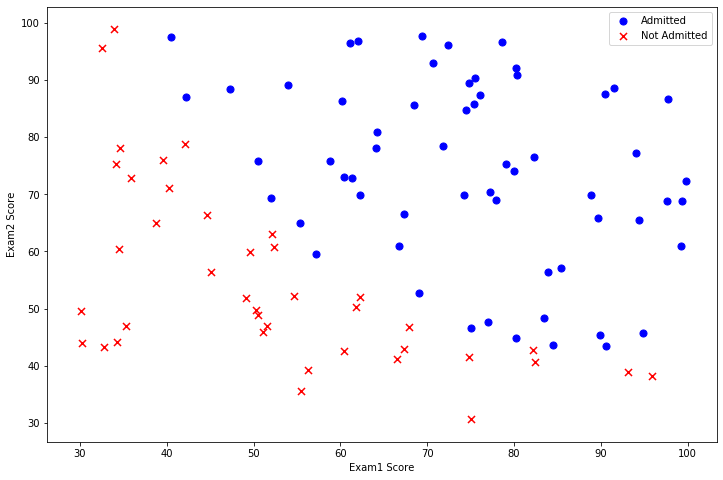

In [5]:
positive = data[data['Admitted']==1]
negative = data[data['Admitted']==0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()

ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def cost(theta, x, y):
    return np.mean(-y*np.log(sigmoid(x@theta)) - (1-y)*np.log(1-sigmoid(x@theta)))

In [8]:
theta = np.zeros(3)
x = pd.concat([pd.DataFrame({'ones': np.ones(data.shape[0])}), data.iloc[:, :-1]], axis=1)
y = data.iloc[:, -1]

In [9]:
cost(theta, x, y)

0.6931471805599453

In [10]:
def gradient(theta, x, y):
    return (1/len(x)) * x.T @ (sigmoid(x @ theta) - y)

In [11]:
gradient(theta, x, y)

ones     -0.100000
Exam1   -12.009217
Exam2   -11.262842
dtype: float64

In [12]:
import scipy.optimize as opt
res = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
print(res)

(array([-25.16131859,   0.20623159,   0.20147149]), 36, 0)


In [13]:
cost(res[0], x, y)

0.20349770158947464

In [14]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [15]:
from sklearn.metrics import classification_report
final_theta = res[0]
y_pred = predict(x, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



## 寻找决策边界
https://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier
> $X \times \theta = 0$  (this is the line)

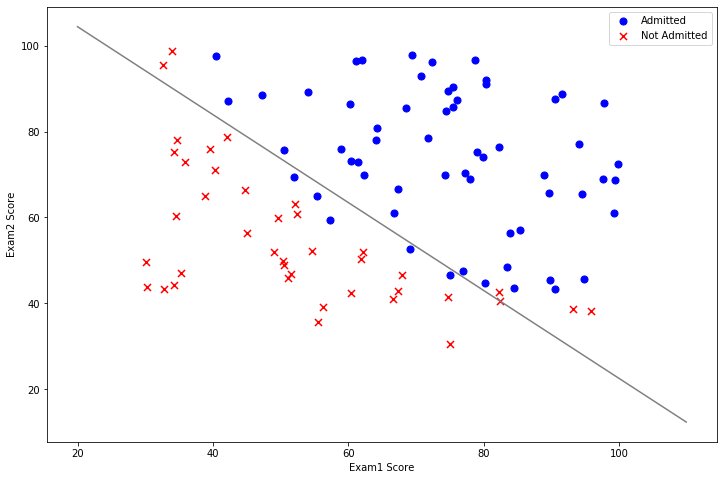

In [16]:
coef =  final_theta / final_theta[2]
x = np.arange(20, 110, step=0.1)
y = - coef[1]*x - coef[0]

positive = data[data['Admitted']==1]
negative = data[data['Admitted']==0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()

ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')

ax.plot(x, y, 'grey')
plt.show()

# 3- 正则化逻辑回归

In [18]:
df = pd.read_csv(r'.\data\ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


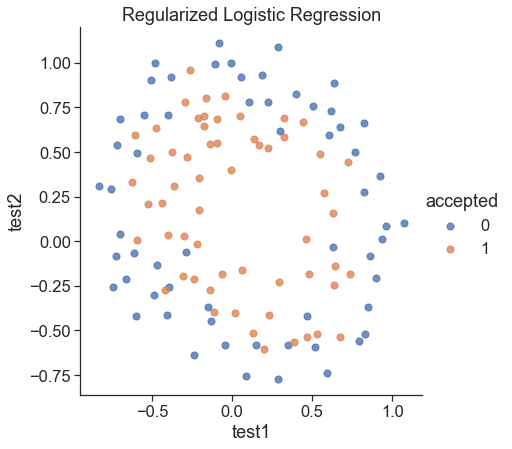

In [23]:
import seaborn as sns
sns.lmplot(x='test1', y='test2', hue='accepted', data=df, 
           height=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')
plt.show()

## feature mapping

In [24]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)

In [28]:
x = feature_mapping(df.test1, df.test2, power=6)
y = df.accepted
print(x.shape)
x.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [30]:
def regularized_cost(theta, x, y, l=1):
    t = theta[1:]
    reg = (l / (2*len(x))) * np.power(t, 2).sum()
    return cost(theta, x, y) + reg

In [31]:
theta = np.zeros(y.shape[1])
regularized_cost(theta, x, y)

0.6931471805599454

In [40]:
def regularized_gradient(theta, x, y, l=1):
    t = theta[1:]
    t_reg = (l / len(x)) * t
    t_reg = np.concatenate([np.zeros(1), t_reg])
    return gradient(theta, x, y) + t_reg

In [41]:
regularized_gradient(theta, x, y)

f00    0.008475
f10    0.018788
f01    0.000078
f20    0.050345
f11    0.011501
f02    0.037665
f30    0.018356
f21    0.007324
f12    0.008192
f03    0.023476
f40    0.039349
f31    0.002239
f22    0.012860
f13    0.003096
f04    0.039303
f50    0.019971
f41    0.004330
f32    0.003386
f23    0.005838
f14    0.004476
f05    0.031008
f60    0.031031
f51    0.001097
f42    0.006316
f33    0.000409
f24    0.007265
f15    0.001376
f06    0.038794
dtype: float64

In [45]:
res = opt.fmin_tnc(func=regularized_cost, x0=theta, fprime=regularized_gradient, args=(x, y))
res

(array([ 1.27271028,  0.62529965,  1.18111686, -2.01987399, -0.9174319 ,
        -1.4316693 ,  0.12393226, -0.36553118, -0.35725402, -0.17516291,
        -1.4581701 , -0.05098418, -0.61558548, -0.27469165, -1.19271296,
        -0.2421784 , -0.20603293, -0.04466179, -0.27778955, -0.29539514,
        -0.45645981, -1.04319157,  0.02779373, -0.29244876,  0.01555762,
        -0.32742408, -0.14389151, -0.92467487]), 32, 1)

In [46]:
res1 = opt.minimize(fun=regularized_cost, x0=theta, args=(x, y), method='Newton-CG', jac=regularized_gradient)
res1

     fun: 0.5290027297139008
     jac: f00   -7.637211e-07
f10   -2.874322e-08
f01   -8.490418e-08
f20   -7.194208e-10
f11   -6.866873e-08
f02   -1.504821e-08
f30   -4.360250e-08
f21   -3.538558e-08
f12   -2.152144e-08
f03   -7.410299e-08
f40   -2.520894e-08
f31   -1.312577e-08
f22   -1.242932e-09
f13   -2.207203e-08
f04   -4.040238e-08
f50   -1.575069e-08
f41   -1.580270e-08
f32    1.626461e-09
f23   -3.830903e-09
f14    2.315494e-08
f05   -5.902708e-08
f60    6.723133e-09
f51    3.720114e-10
f42    4.425490e-09
f33   -1.148813e-09
f24   -8.697466e-09
f15   -3.701402e-09
f06   -1.561873e-08
dtype: float64
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 90
  status: 0
 success: True
       x: f00    1.272737
f10    0.625272
f01    1.181091
f20   -2.019954
f11   -0.917424
f02   -1.431670
f30    0.124006
f21   -0.365535
f12   -0.357242
f03   -0.175130
f40   -1.458156
f31   -0.050990
f22   -0.615555
f13   -0.274707
f04   -1.192814
f50   -0.2

In [47]:
final_theta = res1.x
y_pred = predict(x, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



##  画出决策边界

In [57]:
def cal_theta_on_learning_rate(theta, x, y, l):
    res = opt.minimize(fun=regularized_cost, x0=theta, args=(x, y, l), method='Newton-CG', jac=regularized_gradient)
    return res.x

In [76]:
def cal_decision_boundary_on_theta(theta, x, y, l):
    final_theta = cal_theta_on_learning_rate(theta, x, y, l)
    
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)
    threshold = 2 * 10**-3
    
    cordinates = [(i, j) for i in t1 for j in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, 6)    
    y_pred = mapped_cord @ final_theta
    
    decision = mapped_cord.loc[y_pred.abs()<=threshold, ['f10','f01']]
    return decision

In [94]:
def draw_boundary(l):
    df = pd.read_csv('.\data\ex2data2.txt', names=['f10', 'f01', 'accepted']) 
    x = feature_mapping(df.f10, df.f01, power=6)
    y = df.accepted
    theta = np.zeros(x.shape[1])
    decision = cal_decision_boundary_on_theta(theta, x, y, l)    
    
    sns.lmplot(x='f10', y='f01', hue='accepted', data=df, height=6, fit_reg=False, scatter_kws={"s": 100})

    # plt.scatter(x1, y1, c='R', s=10)
    sns.scatterplot(x="f10", y="f01", data=decision, legend=False, color='R')
    plt.show()

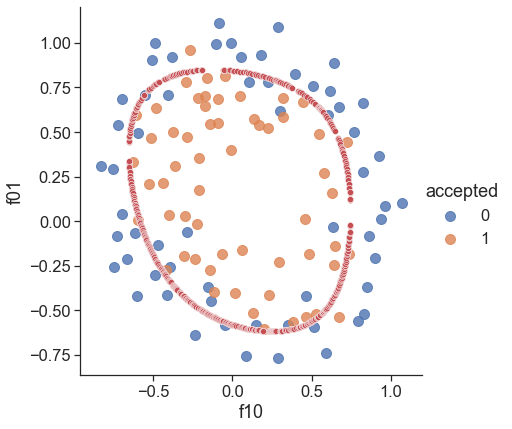

In [89]:
draw_boundary(1)

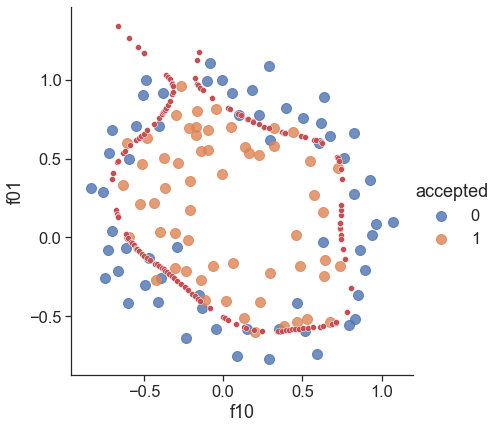

In [90]:
draw_boundary(0)

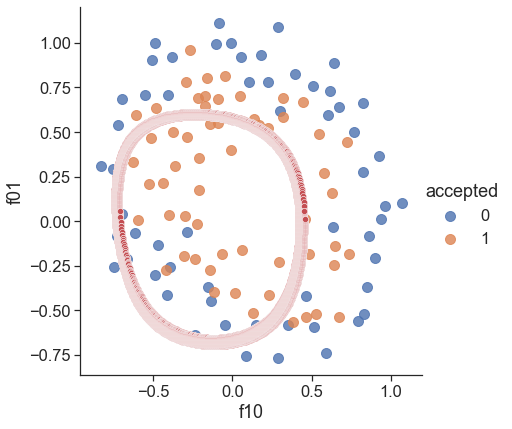

In [95]:
draw_boundary(100)